In [1]:
import pymongo
import pandas as pd
import base64
from PIL import Image
import io
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

In [6]:
# !pip install pymongo

In [7]:
timelines = pd.read_csv('timelines.csv')

In [8]:
demographies = pd.read_csv('demographies.csv')

In [10]:
timelines = timelines.dropna()

In [6]:
# myclient = pymongo.MongoClient("mongodb://localhost:27017/")
# db = myclient["recommendersystems"]
# emo = db["emotions"]

# x = emo.find_one()

# print(x)

In [11]:
emo = pd.read_csv('emotions.csv')
emo = emo.sort_values(by=['userId', 'timestamp'])
emo = emo.dropna()

In [12]:
emo.head()

,smile,innerBrowRaise,browRaise,browFurrow,noseWrinkle,upperLipRaise,lipCornerDepressor,chinRaise,lipPucker,lipPress,...,disgust,contempt,anger,fear,surprise,valence,engagement,timestamp,userId,_id
219105,0.000023,0.286420,0.324985,0.000130,0.043827,0.000022,0.000339,0.388137,0.003109,0.002685,...,0.427603,0.192674,0.001948,0.004508,0.197079,0.0,0.083111,1.623047e+12,Akarsha_12_Female,ObjectId(60bdbd2d75bcd134fe775760)
219107,0.001308,0.005566,0.290480,0.000741,0.265971,0.027669,0.000128,0.035873,0.001603,0.001879,...,0.479791,0.192659,0.001952,0.004343,0.200429,0.0,0.117863,1.623047e+12,Akarsha_12_Female,ObjectId(60bdbd2d75bcd134fe775761)
219106,0.000184,0.011433,0.138774,0.001032,0.209178,0.041469,0.002174,0.028054,0.001491,0.001221,...,0.443336,0.192675,0.001963,0.004485,0.195367,0.0,0.085559,1.623047e+12,Akarsha_12_Female,ObjectId(60bdbd2d75bcd134fe775762)
219108,0.000069,0.004591,0.061073,0.009487,21.571196,0.042780,0.003898,0.233027,0.009496,0.000315,...,2.915958,0.192707,0.001984,0.004514,0.193769,0.0,0.373818,1.623047e+12,Akarsha_12_Female,ObjectId(60bdbd2d75bcd134fe775763)
219110,0.000199,0.006848,0.219500,0.030979,4.126130,0.044266,0.019357,6.855668,0.012115,0.000771,...,0.628714,0.192783,0.002459,0.004506,0.194787,0.0,0.172907,1.623047e+12,Akarsha_12_Female,ObjectId(60bdbd2d75bcd134fe775764)


In [9]:
emo.columns

Index(['smile', 'innerBrowRaise', 'browRaise', 'browFurrow', 'noseWrinkle',
       'upperLipRaise', 'lipCornerDepressor', 'chinRaise', 'lipPucker',
       'lipPress', 'lipSuck', 'mouthOpen', 'smirk', 'eyeClosure', 'attention',
       'lidTighten', 'jawDrop', 'dimpler', 'eyeWiden', 'cheekRaise',
       'lipStretch', 'joy', 'sadness', 'disgust', 'contempt', 'anger', 'fear',
       'surprise', 'valence', 'engagement', 'timestamp', 'userId', '_id'],
      dtype='object')

In [13]:
def getRows(name):
    rows = emo.loc[emo['userId'] == name]
    

In [14]:
# 1 min ad duration for 32 seconds -> tikiri mari
# 3 min 45 seconds duration for 32 seconds -> boc
# 6 min 6 seconds duration for 32 seconds -> cream cracker
# 8 min 6 seconds duration for 32 seconds -> koththu mee

In [15]:
# function for save images
def saveImg(fileName, imgString):
#     print(imgString)
#     return
    image = base64.b64decode(imgString[22:])
    imagePath = ('images/' + fileName)
    img = Image.open(io.BytesIO(image))
    img.save(imagePath, 'png')

In [16]:
# iterate through demographies and save the images
# for i, row in demographies.iterrows():
#     images = json.loads(row['images'])
#     if(len(images) > 2):
#         saveImg(row['userId'] + '_' + str(1) + '.png', images[0]['data'])
#         saveImg(row['userId'] + '_' + str(2) + '.png', images[1]['data'])
# #     break
        
            

In [15]:
movieParts = pd.DataFrame([], columns=emo.columns)
frame = []

In [210]:
for i, timeRow in timelines.iterrows():
    # select user emotions
    if timeRow['StartTime']:
        userEmo = emo.loc[emo['userId'] == timeRow['UserId']]
        if(len(userEmo) == 0):
            continue
        initValue = min(userEmo['timestamp'].values)
        userEmo['timestamp'] -= initValue
        userEmo['timestamp'] /= 1000
        offset = timeRow['StartTime']
        firstMoviePart = userEmo.loc[(userEmo['timestamp'] > offset )& (userEmo['timestamp'] < 60 + offset)]
#         print(len(firstMoviePart))
#         print('user id {} '.format(userEmo['userId'].values[0]))
#         summed = firstMoviePart.(axis=0, skipna = True)
#         print(summed)
        firstMoviePart = firstMoviePart.describe().loc['mean']
#         pd.concat([movieParts, frame.loc['mean']])
#         print(frame.loc['mean'])
        userId = userEmo['userId'].values[0]
        firstMoviePart['part'] = 'M'
        firstMoviePart['num'] = 1
        firstMoviePart['userId'] = userId
        
        movieParts = movieParts.append(firstMoviePart)
        
        firstAd = userEmo.loc[(userEmo['timestamp'] > 60 + offset ) & (userEmo['timestamp'] < 60 + 32 + offset)]
        print(len(firstAd))
        firstAd = firstAd.describe().loc['mean']
        firstAd['part'] = 'A'
        firstAd['num'] = 1
        firstAd['userId'] = userId
        movieParts = movieParts.append(firstAd)
#         break;
        secondMoviePart = userEmo.loc[(userEmo['timestamp'] < 60 + 32 + offset) & (userEmo['timestamp'] < 225 + offset )]
        print(len(secondMoviePart))
        secondMoviePart = secondMoviePart.describe().loc['mean']
        secondMoviePart['part'] = 'M'
        secondMoviePart['num'] = 2
        secondMoviePart['userId'] = userId
        movieParts = movieParts.append(secondMoviePart)
        
        secondAd = userEmo.loc[(userEmo['timestamp'] < 225 + offset) & (userEmo['timestamp'] < 225 + 32 + offset)]
        print(len(secondAd))
        secondAd = secondAd.describe().loc['mean']
        secondAd['part'] = 'A'
        secondAd['num'] = 2
        secondAd['userId'] = userId
        movieParts = movieParts.append(secondAd)
#         break
        thirdMoviePart = userEmo.loc[(userEmo['timestamp'] < 225 + 32 + offset) & (userEmo['timestamp'] < 366 + offset )]
        print(len(thirdMoviePart))
        thirdMoviePart = thirdMoviePart.describe().loc['mean']
        thirdMoviePart['part'] = 'M'
        thirdMoviePart['num'] = 3
        thirdMoviePart['userId'] = userId
        movieParts = movieParts.append(thirdMoviePart)
#         break
        thirdAd = userEmo.loc[(userEmo['timestamp'] < 366 + offset ) & (userEmo['timestamp'] < 366 + offset +32 )]
        print(len(thirdAd))
        thirdAd = thirdAd.describe().loc['mean']
        thirdAd['part'] = 'A'
        thirdAd['num'] = 3
        thirdAd['userId'] = userId
        movieParts = movieParts.append(thirdAd)
#         break
        forthMoviePart = userEmo.loc[(userEmo['timestamp'] < 366 + offset +32 ) & (userEmo['timestamp'] < 486 + offset )]
        print(len(forthMoviePart))
        forthMoviePart = forthMoviePart.describe().loc['mean']
        forthMoviePart['part'] = 'M'
        forthMoviePart['num'] = 4
        forthMoviePart['userId'] = userId
        movieParts = movieParts.append(forthMoviePart)
        
        forthAd = userEmo.loc[(userEmo['timestamp'] < 486 + offset ) & (userEmo['timestamp'] < 486 + offset + 32 )]
        print(len(forthAd))
        forthAd = forthAd.describe().loc['mean']
        forthAd['part'] = 'A'
        forthAd['num'] = 4
        forthAd['userId'] = userId
        movieParts = movieParts.append(forthAd)
        
#         break

<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


727
2190
5116
5712
8073
8772
10468
445


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


1332
3141
3557
5057
5418
6584
446
1390


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


3301
3758
5277
5725
6965


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


418
1360
3229
3682
5172
5423
6405
428


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


1210
3045
3499
4853
5235
6185


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


491
1468
3392
3798
5393
5795
7109
357


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


1093
2347
2674
3923
4284
5208
487
1495


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


3556
4051
5776
6268
7667


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


222
1096
2663
2944
4094
4372
5223


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


0
253
1153
1413
2620
3101
4880


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


304
1148
2547
2906
4078
4430
5389
303


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


1099
2250
2505
3423
3681
4463
11


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


73
189
213
282
302
346


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


253
780
1882
2147
2999
3237
3924


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


441
1395
3274
3775
5294
5610
6917
492


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


1455
3417
3892
5555
6045
7259
461
1397


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


3311
3771
5325
5677
6824


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


669
2135
4689
5310
6836
6836
6836
669


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


2135
4689
5310
6837
6837
6837
580
2110


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


4340
4976
7124
7452
9263


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


581
2152
4358
5019
7164
7496
9304
708


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


2302
5211
5915
8294
8994
10906
25
1718


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


3510
4219
6535
7234
9157


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


698
2432
5429
6148
8603
9323
11309
0


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


1150
1791
2047
2708
3009
3543


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


664
2320
5257
5690
8051
8779
10685
416


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


1450
3121
3483
4847
5249
6306
391
1234


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


2881
3284
4672
5014
6149


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


718
2613
5410
6090
8353
8996
10789
725


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


2453
5281
5928
8149
8804
10614
262
909


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


2013
2268
3156
3433
4132


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


226
649
1664
1899
2599
2848
3562


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


732
2399
5290
6015
8537
9277
11180
380


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


1147
2775
3183
4541
4949
6046
327


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


1206
2795
3203
4499
4850
5828


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


709
1958
4578
4578
4578
4578
4578
765


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


3287
6394
7113
9614
10313
12216


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


572
2389
4781
5356
7292
7851
9402


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


447
2118
3932
4377
5878
6326
7519
439


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


1320
2682
2942
4079
4514
5694


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


427
1695
3502
3937
5429
5863
7020


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


426
1546
3272
3653
4970
5376
6439


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


114
874
1633
1786
2439
2706
2915


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


193
636
1237
1300
1875
2029
2252
36


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


292
387
544
767
998
1483
400


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


1220
2358
2666
3764
4201
5430
0
5


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


14
16
82
88
128


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


326
1633
3063
3405
4606
4966
5876
0


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


9
15
22
32
34
43
8
41


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


75
83
154
158
161


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


303
881
2503
2922
4326
4681
5857


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


355
1118
2593
2948
4135
4488
5288


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


0
8
11
15
23
23
35
3
8


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


16
17
88
93
139


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


23
148
483
574
902
984
1163
324


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


1337
2683
3037
4149
4437
5411
434
1275


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


3100
3532
5021
5457
6654


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


92
354
804
907
1271
1376
1659
78


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


310
675
748
995
1082
1348
83
264


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


629
698
947
1038
1292


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


476
2187
3832
4344
6075
6562
7887
72


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


233
539
603
884
974
1200
413
1289


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


2599
2952
3971
4282
5176


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


719
2528
5055
5611
7427
7899
9083
428


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


1603
3385
3744
5014
5378
6201
402
1509


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


2921
3283
4498
4900
6026


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


407
1323
3078
3468
4698
5096
6145
601


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


2222
4659
5179
6748
7283
8509
597


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


1961
4495
5068
7084
7674
9283
605
2101


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


4579
5160
7186
7775
9383


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


84
306
620
710
996
1089
1338


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


103
526
922
995
1331
1395
1645


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


128
595
1008
1135
1571
1702
2022


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


596
1336
2856
3098
4900
5417
6037


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


779
3757
6977
7751
10327
11075
13167


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


254
931
1773
1969
2793
2987
3643


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


68
291
539
600
766
766
766


<ipython-input-210-ec21dfe28a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] -= initValue
<ipython-input-210-ec21dfe28a42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userEmo['timestamp'] /= 1000


88
419
872
996
1259
1369
1616


In [ ]:
# 1 min ad duration for 32 seconds -> tikiri mari => children, snacks
# 3 min 45 seconds duration for 32 seconds -> boc => elders, savings
# 6 min 6 seconds duration for 32 seconds -> cream cracker => youth, middle age, snacks
# 8 min 6 seconds duration for 32 seconds -> koththu mee => youth, food, snacks, fun

In [ ]:
firstMoviePart = rows.loc[(rows['timestamp'] > 6 )& (rows['timestamp'] < 60 + 6)]
firstAd = rows.loc[(rows['timestamp'] > 60 + 6 ) & (rows['timestamp'] < 60 + 30 + 6)]

In [211]:
len(movieParts['userId'])

624

In [212]:
len(set(list(movieParts['userId'].values)))

77

In [16]:
# movieParts = movieParts.append(frame.loc['mean'])

In [1]:
# pd.DataFrame(frame.loc['mean'], columns=['smile', 'innerBrowRaise', 'browRaise', 'browFurrow', 'noseWrinkle',
#        'upperLipRaise', 'lipCornerDepressor', 'chinRaise', 'lipPucker',
#        'lipPress', 'lipSuck', 'mouthOpen', 'smirk', 'eyeClosure', 'attention',
#        'lidTighten', 'jawDrop', 'dimpler', 'eyeWiden', 'cheekRaise',
#        'lipStretch', 'joy', 'sadness', 'disgust', 'contempt', 'anger', 'fear',
#        'surprise', 'valence', 'engagement', 'timestamp'])

In [17]:
movieParts = pd.read_csv('adsAndMovie_without_na.csv')

In [105]:
# movieParts.to_csv('adsAndMovie_without_na.csv')

In [110]:
# movieParts

In [13]:
movieParts.columns

Index(['Unnamed: 0', 'smile', 'innerBrowRaise', 'browRaise', 'browFurrow',
       'noseWrinkle', 'upperLipRaise', 'lipCornerDepressor', 'chinRaise',
       'lipPucker', 'lipPress', 'lipSuck', 'mouthOpen', 'smirk', 'eyeClosure',
       'attention', 'lidTighten', 'jawDrop', 'dimpler', 'eyeWiden',
       'cheekRaise', 'lipStretch', 'joy', 'sadness', 'disgust', 'contempt',
       'anger', 'fear', 'surprise', 'valence', 'engagement', 'timestamp',
       'userId', '_id', 'num', 'part'],
      dtype='object')

In [18]:
movieParts.loc[movieParts['userId'] == 'Lahiru_23_male']

,Unnamed: 0,smile,innerBrowRaise,browRaise,browFurrow,noseWrinkle,upperLipRaise,lipCornerDepressor,chinRaise,lipPucker,...,anger,fear,surprise,valence,engagement,timestamp,userId,_id,num,part
0,mean,0.944980,0.007321,12.931460,0.000247,0.001265,6.469341,2.508669,3.186199,0.403462,...,0.037459,0.076230,4.207244,-5.051303,15.784402,36.196418,Lahiru_23_male,NaN,1.0,M
1,mean,0.000223,0.001590,12.212350,0.000247,0.003044,0.917955,4.922062,6.981729,3.227182,...,0.390009,0.003132,4.062983,-7.817432,14.007696,82.014279,Lahiru_23_male,NaN,1.0,A
2,mean,0.585185,0.005256,12.794181,0.000236,0.001991,4.346483,3.189683,4.299268,1.393436,...,0.152735,0.048412,4.056534,-5.722758,14.642886,49.798928,Lahiru_23_male,NaN,2.0,M
3,mean,0.250589,0.252834,10.394885,0.007487,0.077309,2.349885,9.574063,3.080715,2.015270,...,0.088650,0.226062,3.796687,-7.349686,13.669061,115.964499,Lahiru_23_male,NaN,2.0,A
4,mean,0.224445,0.237248,11.080581,0.117665,0.073010,2.119239,12.559441,2.798391,1.913271,...,0.094116,0.202612,4.322070,-9.253248,15.385725,129.701614,Lahiru_23_male,NaN,3.0,M
5,mean,2.009563,0.185200,11.330839,0.084009,0.055128,2.136273,14.387203,2.673038,2.903360,...,0.076611,0.144169,3.665013,-8.220958,17.396636,184.123915,Lahiru_23_male,NaN,3.0,A
6,mean,6.595376,0.170446,10.475908,0.077316,0.051068,2.951739,13.332749,2.535868,2.673610,...,0.071339,0.132743,3.669115,-2.989107,22.005073,200.334350,Lahiru_23_male,NaN,4.0,M
7,mean,5.527062,0.170824,9.908801,0.064805,0.043436,2.566737,16.759428,2.217050,2.273058,...,0.062985,0.111668,3.218508,-5.853229,21.800915,240.565510,Lahiru_23_male,NaN,4.0,A


In [19]:
len(set(list(movieParts['userId'])))

77

In [20]:
# emotions => joy, sadness, disgust, contempt, anger, fear, surprise, valence, 
# compound feelings => engagement
# facial features => smile, innerBrowRaise, browRaise, browFurrow, noseWrinkle, upperLipRaise, lipcornerDepressor,
#                     chinRaise, attention, lidTighten, jawDrop, dimpler, eyeWiden, cheekraise, lipStrentch,

In [21]:
movieParts.loc[movieParts['userId'] == 'Kavindu__19_m']

,Unnamed: 0,smile,innerBrowRaise,browRaise,browFurrow,noseWrinkle,upperLipRaise,lipCornerDepressor,chinRaise,lipPucker,...,anger,fear,surprise,valence,engagement,timestamp,userId,_id,num,part
8,mean,0.000185,0.319007,6.998353,0.001138,0.674542,0.084816,0.046733,0.713155,4.945969,...,0.080026,0.007689,2.903018,-6.577463,19.246221,37.964057,Kavindu__19_m,NaN,1.0,M
9,mean,0.002921,0.073352,2.139370,0.000392,0.049952,0.000062,0.389043,1.708147,0.913682,...,0.065231,0.004226,0.523702,-2.471000,5.744845,83.650901,Kavindu__19_m,NaN,1.0,A
10,mean,0.001087,0.216695,4.936268,0.000922,0.422851,0.051089,0.158248,1.003444,3.284312,...,0.070103,0.006293,1.937645,-4.785826,13.578124,51.068849,Kavindu__19_m,NaN,2.0,M
11,mean,0.062620,0.630165,5.914644,0.023340,0.295892,0.021831,1.195718,4.034026,10.374758,...,0.214814,0.131591,1.620177,-6.955137,17.083415,117.537230,Kavindu__19_m,NaN,2.0,A
12,mean,0.915527,0.573557,8.255454,0.023003,0.268827,0.055385,1.074990,3.707468,12.903866,...,0.196061,0.117391,3.027437,-5.351784,22.595755,132.921146,Kavindu__19_m,NaN,3.0,M
13,mean,0.644131,0.491443,6.451533,0.017228,0.385417,0.038968,0.912979,2.765044,9.733340,...,0.142819,0.083972,2.311865,-4.290956,16.850744,187.996214,Kavindu__19_m,NaN,3.0,A
14,mean,0.601232,0.513519,6.740320,0.033288,0.424661,0.036857,1.299648,2.971253,11.184426,...,0.135610,0.078658,2.272716,-4.024977,17.257615,201.611946,Kavindu__19_m,NaN,4.0,M
15,mean,1.742424,0.477822,7.096407,0.027785,0.483938,0.030695,1.460800,3.778996,10.330821,...,0.117218,0.069286,2.640095,-2.960103,17.687075,245.601973,Kavindu__19_m,NaN,4.0,A


In [113]:
movieParts['age'] = -1

In [116]:
for i, row in movieParts.iterrows():
    movieParts.loc[i, 'age'] = getAgeGroup(timelines.loc[timelines['UserId'] == row['userId']]['Age'].values[0])
    

In [117]:
len(movieParts.loc[movieParts['age'] == 0])

88

In [ ]:
# 05-19 => 0
# 19-35 => 1
# 35-55 => 2
# 55-75 => 3

In [18]:
timelines.loc[timelines['UserId'] == 'Lahiru_23_male']['Age'].values[0]

23.0

In [22]:
def getAgeGroup(age):
    if age >= 5 and age < 19:
        return 0
    if age >= 19 and age < 35:
        return 1
    if age >=35 and age < 55:
        return 2
    if age >=55 and age < 100:
        return 3

In [23]:
moviePartsWithAge = pd.read_csv('meanOfMovieWithAge.csv')

In [97]:
parallel = pd.DataFrame(columns=movie)

In [86]:
movie.append('userId')

In [121]:
movieColumns=['1.0_M', '1.0_A', '2.0_M', '2.0_A', '3.0_M', '3.0_A', '4.0_M', '4.0_A', 'userId']

In [110]:
moviePartsWithAge.loc[moviePartsWithAge['userId'] == 'Sanuli_12_female']

,Unnamed: 0,Unnamed: 0.1,smile,innerBrowRaise,browRaise,browFurrow,noseWrinkle,upperLipRaise,lipCornerDepressor,chinRaise,...,anger,fear,surprise,valence,engagement,timestamp,userId,num,part,age
381,384,mean,0.004478,0.079214,0.180139,0.000048,0.019494,0.000014,0.000417,0.025454,...,0.001961,0.004533,0.196332,0.000000,0.081275,116.850000,Sanuli_12_female,1.0,M,0
382,386,mean,13.734286,0.415568,17.645684,0.000025,0.004537,0.004453,0.007019,13.826852,...,0.016012,13.042611,8.926007,7.985348,22.887005,23.976889,Sanuli_12_female,2.0,M,0
383,387,mean,8.241858,0.823882,12.009674,0.000128,0.152310,0.020304,0.004561,8.315151,...,0.020905,17.406558,5.593456,6.987423,13.964845,95.617533,Sanuli_12_female,2.0,A,0
384,388,mean,13.850502,0.635482,8.981869,0.000129,0.209174,0.013873,0.003249,6.430514,...,0.017806,14.194206,3.959048,12.832455,19.135790,160.695545,Sanuli_12_female,3.0,M,0
385,389,mean,13.516180,0.862464,11.728724,0.000136,0.177068,7.918318,0.030543,5.536649,...,0.019624,11.725825,5.803370,8.919461,24.969143,229.309125,Sanuli_12_female,3.0,A,0
386,390,mean,13.946766,0.815472,11.343597,0.000145,0.166685,7.494038,0.029669,6.155555,...,0.018719,11.160208,5.493380,9.203861,24.156518,241.788088,Sanuli_12_female,4.0,M,0
387,391,mean,19.034046,0.873652,12.015184,0.000148,0.227015,6.036607,0.884949,10.122209,...,0.016171,9.891993,5.748975,12.669437,29.463930,292.534372,Sanuli_12_female,4.0,A,0


In [111]:
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
parallel['color'] = labelencoder.fit_transform(parallel['userId'])

In [156]:
!pip install plotly

     |████████████████████████████████| 20.6 MB 10.9 MB/s eta 0:00:01   |█████▍                          | 3.5 MB 4.6 MB/s eta 0:00:04     |████████████████▌               | 10.6 MB 4.6 MB/s eta 0:00:03


In [ ]:
# what are the emotions that contributes a lot for recommending ads
above question is incorrect because we cannot argue that the likability of the ad depends on the emotions triggered while watching the movie part

# find the most suitable ad for each user, gender wise, age wise
# find the most suitable ad for each user based on the previous emotions
# find the most suitable ad for each user based on the previous facial features

# the most dominant emotions for particular age groups while watching ads
# the most dominant facial features for particular age groups while watching ads
# the most dominant emotions for particular gender while watching ads
# the most dominant facial features for particular gender while watching ads

# emotions that contribues a lot for recommending ads gender wise
# facial features contributes a lot for recommending ads gender wise

# tags
# 1st ad = tikiri mari, => children, busicuts, eating, age 5-18, message deliver
# 2nd ad = boc => elders, investment, boc, tutorial
# 3rd ad = cream cracker => young adults, adults, busicuts, family, love 
# 4th ad = maggi => young adults, music, fun, colorful, food, eating

# find the most likable and hated ad for each user



In [173]:
# moviePartsWithAge.to_csv('meanOfMovieWithAge.csv')

In [39]:
# finding the most liked and hated ad
moviePartsWithAge = pd.read_csv('meanOfMovieWithAge.csv')

In [40]:
moviePartsWithAge.loc[moviePartsWithAge['userId'] == 'Lahiru_23_male']

,Unnamed: 0,Unnamed: 0.1,smile,innerBrowRaise,browRaise,browFurrow,noseWrinkle,upperLipRaise,lipCornerDepressor,chinRaise,...,anger,fear,surprise,valence,engagement,timestamp,userId,num,part,age
0,0,mean,0.944980,0.007321,12.931460,0.000247,0.001265,6.469341,2.508669,3.186199,...,0.037459,0.076230,4.207244,-5.051303,15.784402,36.196418,Lahiru_23_male,1.0,M,1
1,1,mean,0.000223,0.001590,12.212350,0.000247,0.003044,0.917955,4.922062,6.981729,...,0.390009,0.003132,4.062983,-7.817432,14.007696,82.014279,Lahiru_23_male,1.0,A,1
2,2,mean,0.585185,0.005256,12.794181,0.000236,0.001991,4.346483,3.189683,4.299268,...,0.152735,0.048412,4.056534,-5.722758,14.642886,49.798928,Lahiru_23_male,2.0,M,1
3,3,mean,0.250589,0.252834,10.394885,0.007487,0.077309,2.349885,9.574063,3.080715,...,0.088650,0.226062,3.796687,-7.349686,13.669061,115.964499,Lahiru_23_male,2.0,A,1
4,4,mean,0.224445,0.237248,11.080581,0.117665,0.073010,2.119239,12.559441,2.798391,...,0.094116,0.202612,4.322070,-9.253248,15.385725,129.701614,Lahiru_23_male,3.0,M,1
5,5,mean,2.009563,0.185200,11.330839,0.084009,0.055128,2.136273,14.387203,2.673038,...,0.076611,0.144169,3.665013,-8.220958,17.396636,184.123915,Lahiru_23_male,3.0,A,1
6,6,mean,6.595376,0.170446,10.475908,0.077316,0.051068,2.951739,13.332749,2.535868,...,0.071339,0.132743,3.669115,-2.989107,22.005073,200.334350,Lahiru_23_male,4.0,M,1
7,7,mean,5.527062,0.170824,9.908801,0.064805,0.043436,2.566737,16.759428,2.217050,...,0.062985,0.111668,3.218508,-5.853229,21.800915,240.565510,Lahiru_23_male,4.0,A,1


In [41]:
# creating favAd dataframe
moviePartsWithAge.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'smile', 'innerBrowRaise', 'browRaise',
       'browFurrow', 'noseWrinkle', 'upperLipRaise', 'lipCornerDepressor',
       'chinRaise', 'lipPucker', 'lipPress', 'lipSuck', 'mouthOpen', 'smirk',
       'eyeClosure', 'attention', 'lidTighten', 'jawDrop', 'dimpler',
       'eyeWiden', 'cheekRaise', 'lipStretch', 'joy', 'sadness', 'disgust',
       'contempt', 'anger', 'fear', 'surprise', 'valence', 'engagement',
       'timestamp', 'userId', 'num', 'part', 'age'],
      dtype='object')

In [42]:
negative = ['sadness', 'disgust', 'contempt', 'anger', 'fear']
positive = ['joy', 'surprise', 'valence', 'engagement', 'attention']

In [43]:
# moviePartsWithAge[['joy', 'surprise', 'engagement', 'attention']]
len(moviePartsWithAge)

619

In [44]:
# moviePartsWithAge.drop('_id', axis=1, inplace=True)
# df.drop('column_name', axis=1, inplace=True) 

In [45]:
moviePartsWithAge = moviePartsWithAge.dropna()
len(moviePartsWithAge)

619

In [27]:
usernames = set(list(movieParts['userId']))

In [46]:
favAd = pd.DataFrame(list(usernames), columns=['userId'])
favAd['ad'] = 0

In [41]:
# favAd.to_csv('favAd_with_all_emotions.csv', index=False)
# moviePartsWithAge.to_csv('moviePartsWithAgeAd.csv', index=False)

In [42]:
# favAd = pd.read_csv('favAd.csv')
favAd = pd.read_csv('favAd_with_all_emotions.csv')

In [43]:
# favAd = favAd.drop(['Unnamed: 0'], axis=1)
favAd.head()

,userId,ad,age,gender,ad_with_joy,ad_with_sadness,ad_with_disgust,ad_with_contempt,ad_with_anger,ad_with_fear,ad_with_surprice,ad_with_engagement,ad_with_surprise
0,vihan_22_male,0.0,1,1,1.0,1.0,4.0,3.0,3.0,2.0,0,1.0,2.0
1,Rashmika_23_male,0.0,1,1,3.0,3.0,3.0,4.0,3.0,1.0,0,1.0,1.0
2,dylon_20_male,0.0,1,1,2.0,1.0,2.0,4.0,3.0,2.0,0,1.0,2.0
3,geethanjali_41_female,1.0,2,0,2.0,1.0,2.0,1.0,2.0,1.0,0,2.0,2.0
4,Sajith_28_male,0.0,1,1,3.0,2.0,4.0,3.0,2.0,3.0,0,3.0,3.0


In [ ]:
favAd = pd.read_csv('favAd.csv')

In [50]:
set(favAd['ad'].values)

{0.0, 1.0, 2.0, 3.0}

In [51]:
# for i in range(0,5):
# #     if i == 1:
# #     favAd.loc[favAd['ad'] == i, 'ad'] = i-1
#     print(len(favAd.loc[favAd['ad'] == i]))

In [52]:
favUsers = list(favAd['userId'].values)

In [53]:
favAd['age'] = -1
favAd['gender'] = -1

In [44]:
for i, row in favAd.iterrows():
#     print(row['userId'])
#     print(row['userId'])
    age = moviePartsWithAge.loc[moviePartsWithAge['userId'] == row['userId']]['age'].values[0]
    favAd.loc[favAd['userId'] == row['userId'], 'age'] = age
    gender = timelines.loc[timelines['UserId'] == row['userId']]['Gender'].values[0].lower()
    if 'female' == gender:
        favAd.loc[favAd['userId'] == row['userId'], 'gender'] = 0
    else:
        favAd.loc[favAd['userId'] == row['userId'], 'gender'] = 1
#     print(favAd.loc[moviePartsWithAge.loc[moviePartsWithAge['userId'] == row['userId']]['age'].values[0]])
#     favAd.loc[favAd['userId'] == row['userId'], 'age'] = 
#     break

In [52]:
set(moviePartsWithAge['age'].values)

{0, 1, 2, 3}

In [48]:
# building classifiers and ml dl models
from sklearn.ensemble import RandomForestClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np

from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv3D, MaxPooling3D, Dropout, SpatialDropout3D,LeakyReLU
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
# from sklearn.metrics import 
import plotly.express as px

In [54]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [91]:
favAd = pd.read_csv('favAd.csv')

In [92]:
x = favAd.drop(['userId', 'ad'], axis=1)
x = np.asarray(x.values, dtype=int)
y = np.asarray(favAd['ad'].values, dtype=int)

In [93]:
favAd.head()

,userId,ad,age,gender
0,vihan_22_male,0.0,1,1
1,Rashmika_23_male,0.0,1,1
2,dylon_20_male,0.0,1,1
3,geethanjali_41_female,1.0,2,0
4,Sajith_28_male,0.0,1,1


In [32]:
df = favAd.drop(['userId'], axis=1)

In [35]:
df = df.reindex(['gender', 'age', 'ad'], axis=1)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
# x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.4, random_state=0)

In [24]:
print(x_train.shape)
print(x_test.shape)

(53, 2)
(24, 2)


In [81]:
model = tf.keras.models.load_model('./models/emotions.h5')

In [101]:
predict = model.predict(x_test)
y_pred = np.argmax(predict, axis=1)
y_test_maxed = np.argmax(y_test, axis=1)
print(classification_report(y_test_maxed, y_pred, target_names=['class 0', 'class 1', 'class 2', 'class 3']))

              precision    recall  f1-score   support

     class 0       0.69      0.83      0.75        93
     class 1       0.58      0.58      0.58        24
     class 2       0.89      0.50      0.64        34
     class 3       0.41      0.37      0.39        35

    accuracy                           0.65       186
   macro avg       0.64      0.57      0.59       186
weighted avg       0.66      0.65      0.64       186



In [84]:
auc = 100*roc_auc_score(y_test, predict, average='weighted')
acc = 100*accuracy_score(np.argmax(y_test, axis=1), np.argmax(predict, axis=1))
prec, rec, f1, _ = precision_recall_fscore_support(np.argmax(y_test, axis=1), np.argmax(predict, axis=1), average='weighted')
print('Test accuracy: {:.5f}, AUC {:.5f}, Precision {:.5f}, Recall {:.5f}, F1 {:.5f}, \n'.format( acc, auc, prec, rec, f1))


Test accuracy: 65.05376, AUC 80.15274, Precision 0.66211, Recall 0.65054, F1 0.64301, 



In [128]:
model = tf.keras.models.load_model('models/facial_features.h5')

In [141]:

auc = 100*roc_auc_score(y_test, predict, average='weighted')
acc = 100*accuracy_score(np.argmax(y_test, axis=1), np.argmax(predict, axis=1))
prec, rec, f1, _ = precision_recall_fscore_support(np.argmax(y_test, axis=1), np.argmax(predict, axis=1), average='weighted')
print('Test accuracy: {:.5f}, AUC {:.5f}, Precision {:.5f}, Recall {:.5f}, F1 {:.5f}, \n'.format( acc, auc, prec, rec, f1))


Test accuracy: 86.55914, AUC 94.99042, Precision 0.86813, Recall 0.86559, F1 0.86601, 



In [140]:
model.save('models/facial_features.h5')


In [115]:
# ensemble classifier

In [168]:
# favAd.head()
# ensembleInput = 
ensembleInput = moviePartsWithAge[['userId','joy', 'sadness', 'disgust', 'contempt',
       'anger', 'fear', 'surprise', 'valence', 'engagement', 'smile', 'innerBrowRaise', 'browRaise', 'browFurrow',
       'noseWrinkle', 'upperLipRaise', 'lipCornerDepressor', 'chinRaise',
       'lipPucker', 'lipPress', 'lipSuck', 'mouthOpen', 'smirk', 'eyeClosure','lidTighten', 'jawDrop', 'dimpler', 'eyeWiden',
       'cheekRaise', 'lipStretch', 'ad']]
# ensembleInput 

In [169]:
favAd.head()

,userId,ad,age,gender
0,vihan_22_male,0.0,1,1
1,Rashmika_23_male,0.0,1,1
2,dylon_20_male,0.0,1,1
3,geethanjali_41_female,1.0,2,0
4,Sajith_28_male,0.0,1,1


In [170]:
ensembleInput['age'] = -1
ensembleInput['gender'] = -1

# for i, row in ensembleInput.iterrows():
#     ensembleInput.loc[i, 'age'] = -1
#     ensembleInput.loc[i, 'gender'] = -1
    

<ipython-input-170-cce44596906e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-170-cce44596906e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [171]:
for i, row in ensembleInput.iterrows():
#     print(row['userId'])
    age = favAd.loc[favAd['userId'] == row['userId']]['age'].values[0]
    gender = favAd.loc[favAd['userId'] == row['userId']]['gender'].values[0]
#     print(age)
#     print(gender)
    ensembleInput.loc[ensembleInput['userId'] == row['userId'], 'age'] = age
    ensembleInput.loc[ensembleInput['userId'] == row['userId'], 'gender'] = gender
    
#     break;

/home/hicup/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [172]:
ensembleInput = ensembleInput[['joy', 'sadness', 'disgust', 'contempt',
       'anger', 'fear', 'surprise', 'valence', 'engagement', 'smile', 'innerBrowRaise', 'browRaise', 'browFurrow',
       'noseWrinkle', 'upperLipRaise', 'lipCornerDepressor', 'chinRaise',
       'lipPucker', 'lipPress', 'lipSuck', 'mouthOpen', 'smirk', 'eyeClosure','lidTighten', 'jawDrop', 'dimpler', 'eyeWiden',
       'cheekRaise', 'lipStretch', 'age', 'gender', 'ad']]

In [173]:
x = ensembleInput.drop(['ad'], axis=1)
x = np.asarray(x.values, dtype=int)
y = np.asarray(ensembleInput['ad'].values, dtype=int)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)
# x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.4, random_state=50)
print(x_train.shape)
print(x_test.shape)


(495, 31)
(124, 31)


In [172]:

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1', 'class 2', 'class 3']))


[[65  0  0  0]
 [23  0  0  0]
 [12  0  6  0]
 [18  0  0  0]]
Accuracy0.5725806451612904
              precision    recall  f1-score   support

     class 0       0.55      1.00      0.71        65
     class 1       0.00      0.00      0.00        23
     class 2       1.00      0.33      0.50        18
     class 3       0.00      0.00      0.00        18

    accuracy                           0.57       124
   macro avg       0.39      0.33      0.30       124
weighted avg       0.43      0.57      0.44       124



/home/hicup/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [173]:
clf = svm.SVC()
clf.fit(x_train, y_train)
svmPredict = clf.predict(x_test)
cm = confusion_matrix(y_test, svmPredict)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, svmPredict)))
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1', 'class 2', 'class 3']))

[[64  1  0  0]
 [ 6 14  0  3]
 [ 5  0 13  0]
 [ 8  0  0 10]]
Accuracy0.8145161290322581
              precision    recall  f1-score   support

     class 0       0.55      1.00      0.71        65
     class 1       0.00      0.00      0.00        23
     class 2       1.00      0.33      0.50        18
     class 3       0.00      0.00      0.00        18

    accuracy                           0.57       124
   macro avg       0.39      0.33      0.30       124
weighted avg       0.43      0.57      0.44       124



/home/hicup/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [174]:
x = ensembleInput.drop(['ad'], axis=1)
x = np.asarray(x.values, dtype=int)
y = np.asarray(ensembleInput['ad'].values, dtype=int)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=50)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.4, random_state=50)

y_test = to_categorical(y_test).astype(np.int32)
y_train = to_categorical(y_train).astype(np.int32)
y_val = to_categorical(y_val).astype(np.int32)


In [175]:
x_train.shape

(309, 31)

In [176]:
def create_model():
    model = Sequential()
    model.add(Dense(100, input_dim=31))
    model.add(LeakyReLU())
    model.add(Dense(50))
    model.add(LeakyReLU())
    model.add(Dense(25))
    model.add(LeakyReLU())
    model.add(Dense(10))
    model.add(LeakyReLU())
    model.add(Dense(4, activation='softmax'))
    # Compile model
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [177]:
model = create_model()
visualizer = tf.keras.callbacks.TensorBoard(log_dir='./timestamps_ensemble/')
earlystops = tf.keras.callbacks.EarlyStopping(patience=patience, restore_best_weights=True, verbose=1)


# Compile the model
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

# Fit data to model
history = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_data=(x_val, y_val),
            callbacks=[visualizer, earlystops])

Epoch 1/500
10/10 [==============================] - 1s 22ms/step - loss: 2.0676 - accuracy: 0.1955 - val_loss: 1.7568 - val_accuracy: 0.2016
Epoch 2/500
10/10 [==============================] - 0s 6ms/step - loss: 1.5633 - accuracy: 0.2208 - val_loss: 1.3674 - val_accuracy: 0.2177
Epoch 3/500
10/10 [==============================] - 0s 6ms/step - loss: 1.1643 - accuracy: 0.2365 - val_loss: 1.1187 - val_accuracy: 0.2742
Epoch 4/500
10/10 [==============================] - 0s 6ms/step - loss: 1.0567 - accuracy: 0.2001 - val_loss: 0.9727 - val_accuracy: 0.2742
Epoch 5/500
10/10 [==============================] - 0s 6ms/step - loss: 0.9622 - accuracy: 0.2135 - val_loss: 0.8799 - val_accuracy: 0.2984
Epoch 6/500
10/10 [==============================] - 0s 7ms/step - loss: 0.8398 - accuracy: 0.2120 - val_loss: 0.8171 - val_accuracy: 0.3065
Epoch 7/500
10/10 [==============================] - 0s 6ms/step - loss: 0.7576 - accuracy: 0.2712 - val_loss: 0.7681 - val_accuracy: 0.3226
Epoch 8/500


Epoch 59/500
10/10 [==============================] - 0s 7ms/step - loss: 0.4015 - accuracy: 0.6901 - val_loss: 0.4325 - val_accuracy: 0.6048
Epoch 60/500
10/10 [==============================] - 0s 6ms/step - loss: 0.3980 - accuracy: 0.6896 - val_loss: 0.4310 - val_accuracy: 0.6129
Epoch 61/500
10/10 [==============================] - 0s 6ms/step - loss: 0.4003 - accuracy: 0.6898 - val_loss: 0.4283 - val_accuracy: 0.6048
Epoch 62/500
10/10 [==============================] - 0s 6ms/step - loss: 0.3824 - accuracy: 0.7244 - val_loss: 0.4267 - val_accuracy: 0.6048
Epoch 63/500
10/10 [==============================] - 0s 6ms/step - loss: 0.3970 - accuracy: 0.7151 - val_loss: 0.4246 - val_accuracy: 0.6210
Epoch 64/500
10/10 [==============================] - 0s 6ms/step - loss: 0.3998 - accuracy: 0.7274 - val_loss: 0.4224 - val_accuracy: 0.6129
Epoch 65/500
10/10 [==============================] - 0s 6ms/step - loss: 0.3923 - accuracy: 0.6866 - val_loss: 0.4206 - val_accuracy: 0.6210
Epoch 

10/10 [==============================] - 0s 6ms/step - loss: 0.2436 - accuracy: 0.8045 - val_loss: 0.2959 - val_accuracy: 0.7823
Epoch 174/500
10/10 [==============================] - 0s 6ms/step - loss: 0.2389 - accuracy: 0.8006 - val_loss: 0.2954 - val_accuracy: 0.7903
Epoch 175/500
10/10 [==============================] - 0s 6ms/step - loss: 0.2214 - accuracy: 0.8331 - val_loss: 0.2944 - val_accuracy: 0.7903
Epoch 176/500
10/10 [==============================] - 0s 6ms/step - loss: 0.2142 - accuracy: 0.8415 - val_loss: 0.2947 - val_accuracy: 0.7823
Epoch 177/500
10/10 [==============================] - 0s 6ms/step - loss: 0.2111 - accuracy: 0.8407 - val_loss: 0.2931 - val_accuracy: 0.7823
Epoch 178/500
10/10 [==============================] - 0s 6ms/step - loss: 0.2339 - accuracy: 0.8310 - val_loss: 0.2923 - val_accuracy: 0.7823
Epoch 179/500
10/10 [==============================] - 0s 6ms/step - loss: 0.2155 - accuracy: 0.8695 - val_loss: 0.2923 - val_accuracy: 0.7823
Epoch 180/500

10/10 [==============================] - 0s 6ms/step - loss: 0.1053 - accuracy: 0.9291 - val_loss: 0.2207 - val_accuracy: 0.8468
Epoch 288/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0954 - accuracy: 0.9508 - val_loss: 0.2199 - val_accuracy: 0.8468
Epoch 289/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1022 - accuracy: 0.9425 - val_loss: 0.2211 - val_accuracy: 0.8468
Epoch 290/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0979 - accuracy: 0.9542 - val_loss: 0.2200 - val_accuracy: 0.8387
Epoch 291/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1017 - accuracy: 0.9423 - val_loss: 0.2200 - val_accuracy: 0.8468
Epoch 292/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0935 - accuracy: 0.9477 - val_loss: 0.2179 - val_accuracy: 0.8468
Epoch 293/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0936 - accuracy: 0.9550 - val_loss: 0.2193 - val_accuracy: 0.8468
Epoch 294/500

10/10 [==============================] - 0s 7ms/step - loss: 0.0339 - accuracy: 0.9924 - val_loss: 0.1984 - val_accuracy: 0.8790
Epoch 402/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0422 - accuracy: 0.9898 - val_loss: 0.2043 - val_accuracy: 0.8790
Epoch 403/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.9929 - val_loss: 0.2006 - val_accuracy: 0.8790
Epoch 404/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0343 - accuracy: 0.9926 - val_loss: 0.2032 - val_accuracy: 0.8790
Epoch 405/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0352 - accuracy: 0.9904 - val_loss: 0.1968 - val_accuracy: 0.8790
Epoch 406/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0387 - accuracy: 0.9812 - val_loss: 0.2069 - val_accuracy: 0.8710
Epoch 407/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0300 - accuracy: 0.9924 - val_loss: 0.1980 - val_accuracy: 0.8790
Epoch 408/500

In [179]:
model = tf.keras.models.load_model('models/ensemble.h5')

In [180]:
# y_test.argmax(1)
predict = model.predict(x_test)
y_pred = np.argmax(predict, axis=1)
y_test_maxed = np.argmax(y_test, axis=1)
print(classification_report(y_test_maxed, y_pred, target_names=['class 0', 'class 1', 'class 2', 'class 3']))


              precision    recall  f1-score   support

     class 0       0.90      0.96      0.93        96
     class 1       0.87      0.90      0.89        30
     class 2       0.96      0.83      0.89        29
     class 3       0.89      0.81      0.85        31

    accuracy                           0.90       186
   macro avg       0.91      0.87      0.89       186
weighted avg       0.90      0.90      0.90       186



In [154]:

auc = 100*roc_auc_score(y_test, predict, average='weighted')
acc = 100*accuracy_score(np.argmax(y_test, axis=1), np.argmax(predict, axis=1))
prec, rec, f1, _ = precision_recall_fscore_support(np.argmax(y_test, axis=1), np.argmax(predict, axis=1), average='weighted')
print('Test accuracy: {:.5f}, AUC {:.5f}, Precision {:.5f}, Recall {:.5f}, F1 {:.5f}, \n'.format( acc, auc, prec, rec, f1))


Test accuracy: 90.32258, AUC 97.38086, Precision 0.90449, Recall 0.90323, F1 0.90225, 



/home/hicup/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning:

Pass labels=[0, 1, 2, 3] as keyword args. From version 0.25 passing these as positional arguments will result in an error



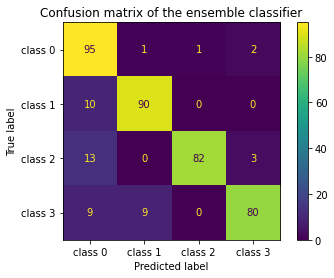

In [155]:
model = tf.keras.models.load_model('models/facial_features.h5')


labels = ['class 0', 'class 1', 'class 2', 'class 3']
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predict, axis=1), [0,1,2,3])
d = cm/cm.sum(axis=1)[:, np.newaxis] * 100
cm = d.astype(int)
ax= plt.subplot()
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion matrix of the ensemble classifier'); 
# ax.legend()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(ax=ax)

In [184]:
# %tensorboard --logdir ./timestamps_ensemble/ --host localhost

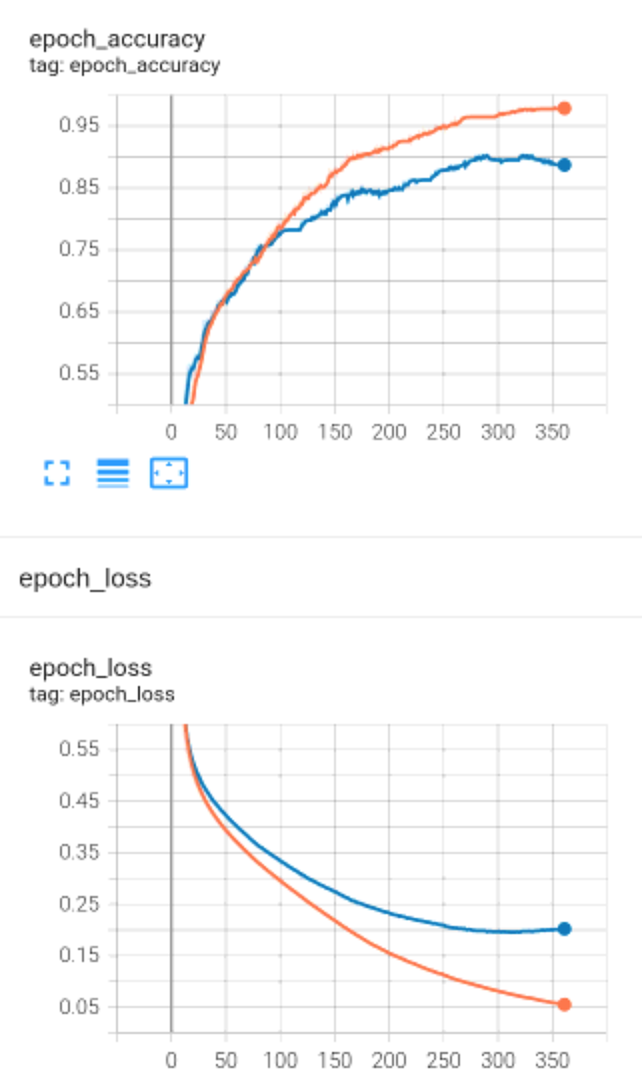

In [185]:
Image(filename='trainingLogs/ensemble.png')


In [186]:
model.save('models/ensemble.h5')

In [191]:

# labels = ['class 0', 'class 1', 'class 2', 'class 3']
# cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predict, axis=1), [0,1,2,3])
# ax= plt.subplot()
# ax.set_xlabel('Predicted labels');
# ax.set_ylabel('True labels'); 
# ax.set_title('Confusion matrix of the facial features based classifier'); 
# # ax.legend()
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# disp.plot(ax=ax)


In [192]:
# labels = ['class 0', 'class 1', 'class 2', 'class 3']
# cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predict, axis=1), [0,1,2,3])
# ax= plt.subplot()
# ax.set_xlabel('Predicted labels');
# ax.set_ylabel('True labels'); 
# ax.set_title('Confusion matrix of the facial ensemble'); 
# # ax.legend()
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# disp.plot(ax=ax)

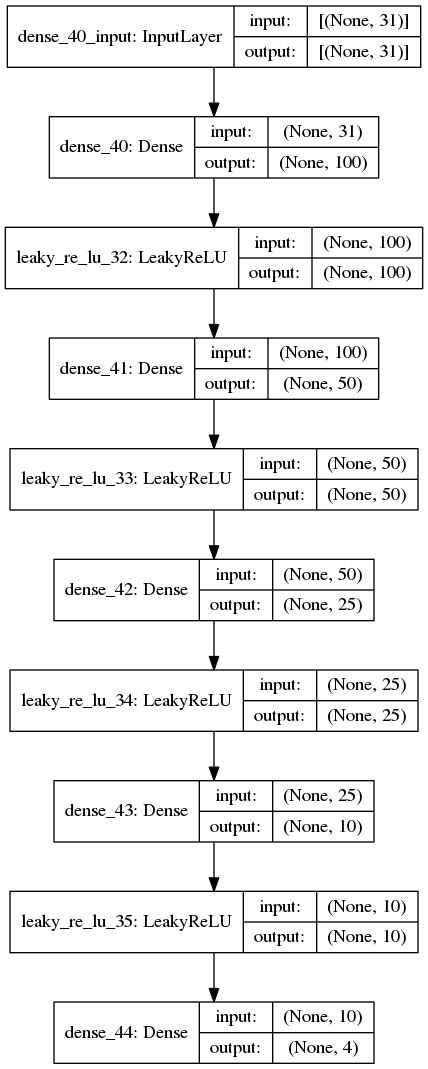

In [182]:
tf.keras.utils.plot_model(model, to_file='arch.png', show_shapes=True)